
**IDs**:

315871939

314804568

**Date**:

25/11/2024

##### Advanced Statistical Analysis and Model-Based Learning (Fall 2024-2025)
# Home Assignment 1
#### Topics:
- The Linear Model
- Linear Least Squares
- Exploratory data analysis
- Normal, Chi-Squared, t, and F distributions

#### Due: 25/11/2024 by 18:30

#### Instructions:
- Write your IDs and date at the top cell.
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ (preffered) or submit additional notes.

## Problem 1 (EDA)
For this problem, you will need to go through the exploratory data analysis (EDA) notebook in the course page

1. Download the Red Wine Quality Dataset from UCI repository (the file winequality-red.csv at https://archive.ics.uci.edu/ml/datasets/Wine+Quality). 
2. Filter columns to cosnider only the five variables: $\texttt{density}$, $\texttt{alcohol}$, $\texttt{pH}$, $\texttt{volatile}$, $\texttt{acidity}$, and the target variable $\texttt{quality}$.
3. Evaluate mean, varaince, median, q1, q3, IQR, and absolute range of each variable.
4. Indicate whether there are outliers, namely data points exceeding 1.5 the IQR (above or below). Mark and remove those.  
5. Illustrate the covaraince matrix of all variable. Indicate variables most correlated with the target variable. 
6. Illustrate a "pairs plot", i.e. a matrix of scatterplots in which each cell involves two variables except the diagonal.


<hr>
<hr>

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2)

In [276]:
red_wine_data = pd.read_csv('winequality-red.csv', sep = ';')
wine_data = red_wine_data[['density', 'alcohol', 'pH', 'volatile acidity', 'quality']]

In [277]:
wine_data.head()

,density,alcohol,pH,volatile acidity,quality
0,0.9978,9.4,3.51,0.70,5
1,0.9968,9.8,3.20,0.88,5
2,0.9970,9.8,3.26,0.76,5
3,0.9980,9.8,3.16,0.28,6
4,0.9978,9.4,3.51,0.70,5


#### 3)

In [278]:
desc_statistics =  wine_data.describe().transpose()
desc_statistics['var'] = desc_statistics['std'] ** 2
desc_statistics['iqr'] = desc_statistics['75%'] - desc_statistics['25%']
desc_statistics['abs_range'] = desc_statistics['max'] - desc_statistics['min']
desc_statistics = desc_statistics[['mean','var', '25%', '50%', '75%', 'iqr', 'abs_range']]
desc_statistics = desc_statistics.rename(columns={'25%': 'q1', '50%': 'median', '75%': 'q3'})

In [279]:
desc_statistics

,mean,var,q1,median,q3,iqr,abs_range
density,0.996747,0.000004,0.9956,0.99675,0.997835,0.002235,0.01362
alcohol,10.422983,1.135647,9.5000,10.20000,11.100000,1.600000,6.50000
pH,3.311113,0.023835,3.2100,3.31000,3.400000,0.190000,1.27000
volatile acidity,0.527821,0.032062,0.3900,0.52000,0.640000,0.250000,1.46000
quality,5.636023,0.652168,5.0000,6.00000,6.000000,1.000000,5.00000


#### 4)

In [280]:
outliers_count = ((wine_data < (desc_statistics['q1'] - (1.5 * desc_statistics['iqr']))) | (wine_data > (desc_statistics['q3'] + (1.5 * desc_statistics['iqr'])))).any(axis = 1).sum()
print('there are {} outliers in the dataset'.format(outliers_count))

there are 113 outliers in the dataset


In [281]:
# filtering out the outliers:

wine_data = wine_data[((wine_data < (desc_statistics['q1'] - (1.5 * desc_statistics['iqr']))) | (wine_data > (desc_statistics['q3'] + (1.5 * desc_statistics['iqr'])))).any(axis = 1) == False]  

In [282]:
wine_data.shape

(1486, 5)

#### 5)

In [283]:
wine_data.corr()

,density,alcohol,pH,volatile acidity,quality
density,1.000000,-0.469661,-0.273965,0.010053,-0.162986
alcohol,-0.469661,1.000000,0.141818,-0.224207,0.488484
pH,-0.273965,0.141818,1.000000,0.233119,-0.051746
volatile acidity,0.010053,-0.224207,0.233119,1.000000,-0.364143
quality,-0.162986,0.488484,-0.051746,-0.364143,1.000000


alcohol is the variable that has the highest correlation with the quality of the wine (0.49).

#### 6)

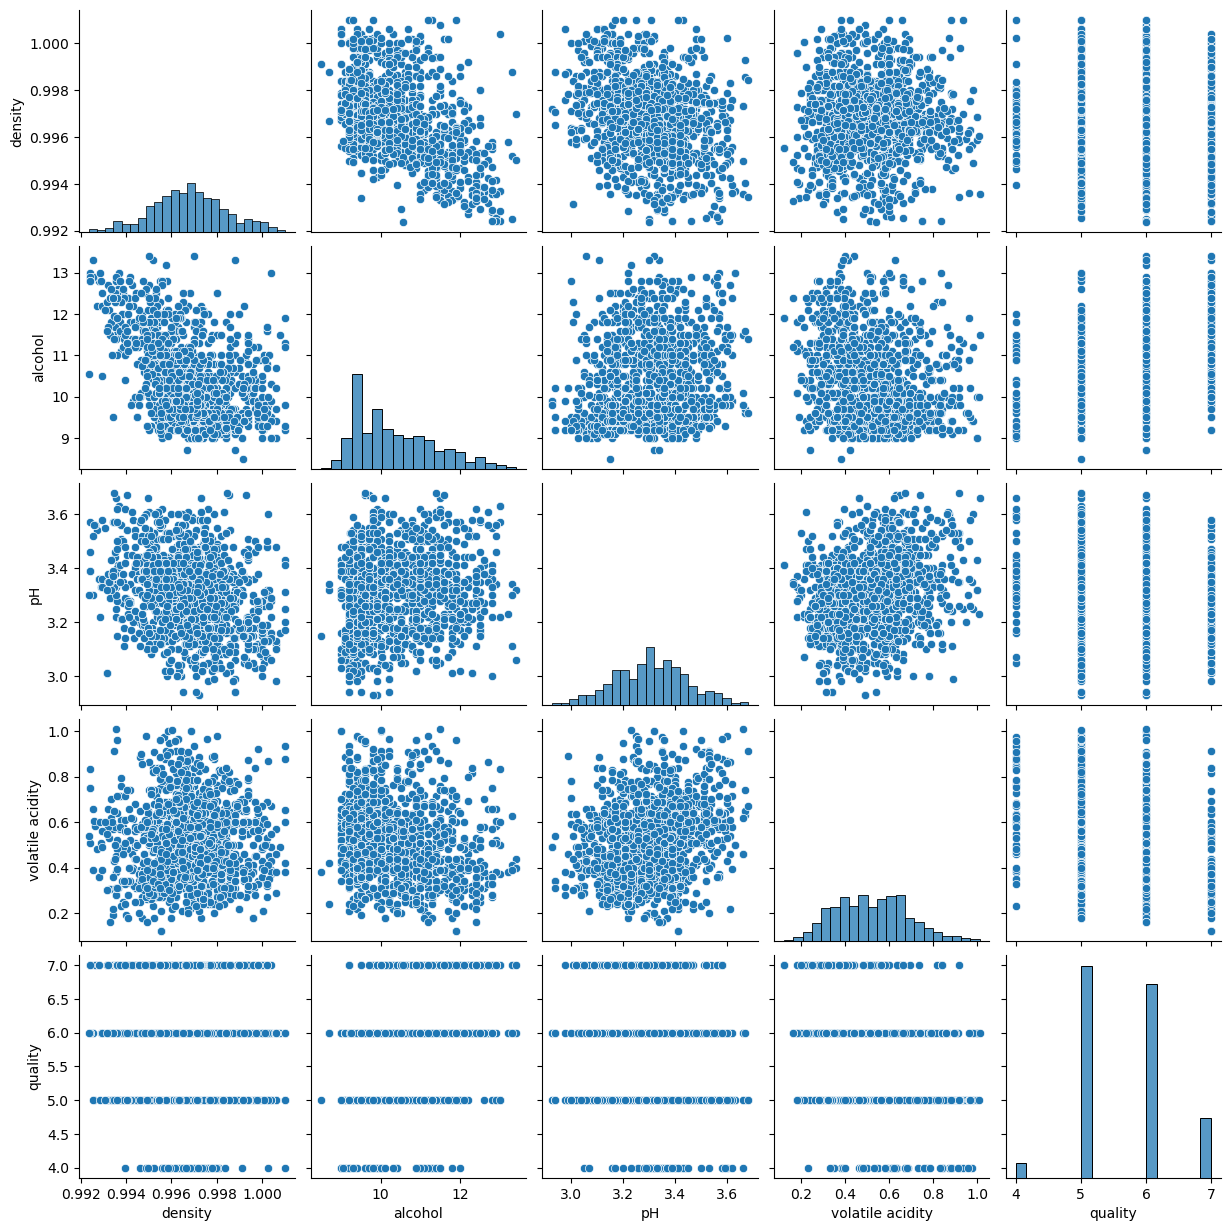

In [284]:
sns.pairplot(wine_data)

## Problem 2 (Making a Model)
A social media corporation is experiencing a decline in user engagement over the last few months. One of their team wants to measure the effect of introducing a new feature on the time users interact with their app. The model they want to use has the daily time users spending using their app declining linearly over time, for day $t=0,1,\ldots$. At time $t=40$, they launch the campaign but only for users with a certain test group. They think this could change the slope at time $t=40$ for users within this group (it changes the *slope*, hence would not put a jump discontinuity into the engagement level).

1. Write a linear model that the team can use. Be sure to say what features $\{Z_{ij}\}$ go into the model.
2. Maybe the intervention did not do anything. Which parameter in your model would then be zero? (make sure you have such a parameter in your model). 

*The point*: as data scientist/statistician, you have to turn the domain person's intuition into a model. They may not come to you talking about $x$-s and $y$-s and $\beta$ and $\epsilon$. Also, the model might be something they want to disprove. 

<hr> 
<hr>

### solution:

### 1)

$y$ - engagement

$x$ - time 


$$y = \beta_0 + \beta_1 * x + \beta_2 * max(0, x - 40) + \epsilon$$


### 2)

In case that the intervention did not do anything, the $\beta_2$ parameter would be zero. This is because in such case, there is no difference between the time before the intervention and the time after the intervention, and thus there would be no effect for the time being after t=40.

## Problem 3 (Linearization trick in Sinusoidal Regression)
1. Consider the model:
$$
\mathbb E[Y|X=x] = \beta_0 + \beta_1 \cos\left(2\pi  (x - \beta_2) \right)
$$
with predictor $x$, response variable $y$, and parameters $\beta_0$, $\beta_1$, and $\beta_2$. Is this model linear? 

2. Consider instead the model:
$$
\mathbb E[Y|X=x] = \beta_0' + \beta_1' \sin\left(2\pi \cdot x\right) + \beta_2' \cos(2 \pi \cdot x),
$$
with predictor $x$, response variable $y$, and parameters $\beta_0'$, $\beta_1'$, and $\beta_2'$. Is this model linear?

3. Show that the model from 1 can be written as the model in 2 in the sense that $(\beta_0', \beta_1', \beta_2')$ are functions of $(\beta_0, \beta_1, \beta_2)$. Find these functions.

<hr> 
<hr>


### solution:

### 1)

No, the given model is not linear.

A model is linear if it can be expressed as:

$$
\mathbb E[Y|X=x] = \beta_0f_0(x) + \beta_1f_1(x) + ... + \beta_kf_k(x)
$$

where the parameters $\beta_0, \beta_1, ... ,\beta_k$ appear individually and linearly, and $f_i(x)$ are functions of the predictors $x$.

In this model, although the term $\beta_0$ is linear, the term $\mathbb \beta_1 \cos\left(2\pi  (x - \beta_2) \right)$ involves $\beta_2$ inside a cosine function, which makes the model nonlinear in the parameters.

### 2)

Yes, this model is linear.

A model is linear if it is linear in the parameters ($\beta_0', \beta_1' $ and  $\beta_2'$) regardless of whether the predictor $x$ is transformed in some nonlinear way. The parameters are not multiplied together, raised to powers, or involved in nonlinear functions like $sin, cos$ etc. They appear as coefficients of the transformed predictors.


### 3) 

$\cos(2\pi(x-\beta_{2})) = \cos(2\pi x)\cos(2\pi \beta_{2}) + \sin(2\pi x)\sin(2\pi \beta_{2})$

**subtituting this into the first model**

$\mathbb E[Y|X=x] = \beta_0 + \beta_1 [\cos(2\pi x)\cos(2\pi \beta_{2}) + \sin(2\pi x)\sin(2\pi \beta_{2})]$

we can identify the following

$\beta_0'=\beta_0$

$\beta_1' = \beta_1 \sin(2 \pi \beta_2)$

$\beta_2' = \beta_1 \cos(2\pi \beta_2)$

## Problem 4 (Least squares)

1. Consider the Red Wine Quality Dataset of the previous question. Fit a least squares model to ``quality`` based on the other variables and a constant term. Report on the vector of regression coefficients $\hat{\beta}$. Make sure to indicate which entry is associated with each predictor. 
3. Plot the response values $y$ and the fitted response $\hat{y} = Z \hat{\beta}$
4. Illustrate the histogram of the residual vector $\hat{\epsilon}$; what is the average of this vector?
5. Write a code that verifies  (using e.g. ``numpy.isclose``):
 - $H = H^\top$ 
 - $H^2 = H$
 - $\hat{\epsilon}^\top \hat{y} = 0$ 
 - $\lambda_i(H) \in \{0,1\}$, where $\lambda_i$ is the $i$-th eigenvalue of $H$
 - $\|y\|^2 = \|\hat{\epsilon}\|^2 + \|\hat{y}\|^2$
 - $SS_{total} = SS_{fit} + SS_{residual}$, for the sum of squares decomposition 

<hr>
<hr>

We use the pseudo-inverse solution

### 1)

In [285]:
wine_data.head(3)

,density,alcohol,pH,volatile acidity,quality
0,0.9978,9.4,3.51,0.70,5
1,0.9968,9.8,3.20,0.88,5
2,0.9970,9.8,3.26,0.76,5


In [286]:
# Your code here

bias = np.ones_like(a = red_wine_data['quality']).reshape(red_wine_data.shape[0],1)
X = np.array(red_wine_data.drop('quality', axis = 1))
X = np.hstack([bias, X])
y = red_wine_data['quality']

In [287]:
indices = ['bias'] + list(red_wine_data.drop('quality', axis = 1).columns)

coefficients = ((np.linalg.inv(X.transpose() @ X)) @ X.transpose()) @ y
coefficients = pd.Series(data = coefficients, index = indices)

In [288]:
coefficients

bias                    21.965208
fixed acidity            0.024991
volatile acidity        -1.083590
citric acid             -0.182564
residual sugar           0.016331
chlorides               -1.874225
free sulfur dioxide      0.004361
total sulfur dioxide    -0.003265
density                -17.881164
pH                      -0.413653
sulphates                0.916334
alcohol                  0.276198
dtype: float64

### 2)

In [289]:
y_pred = X @ coefficients

Text(0, 0.5, 'Fitted Response')

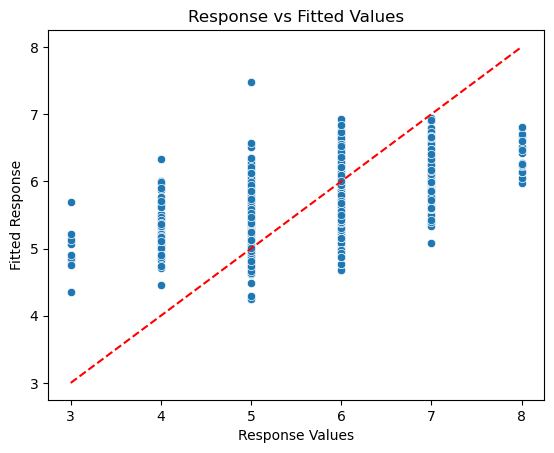

In [290]:
sns.scatterplot(x=y, y=y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Diagonal line
plt.title("Response vs Fitted Values")
plt.xlabel("Response Values")
plt.ylabel("Fitted Response")

### 3)

In [291]:
residuals = y - y_pred

Text(0, 0.5, 'Frequency')

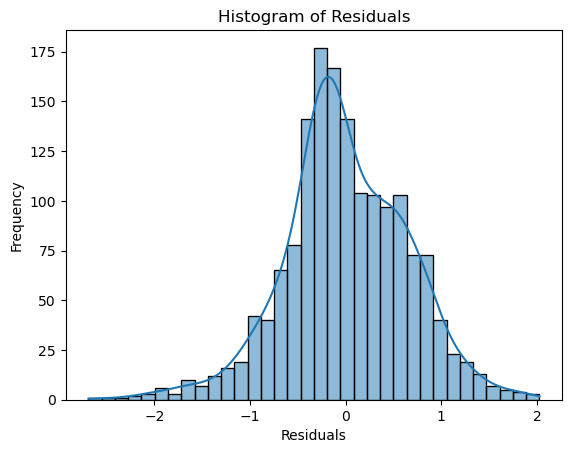

In [292]:
sns.histplot(x= residuals, kde = True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")


The average of the residual vector is always 0 by definition in linear regression because the regression model minimizes the sum of squared residuals, ensuring that the sum of residuals (and thus their mean) is zero when the model includes an intercept term. This property ensures that the model's predictions are unbiased with respect to the actual values.

### 4)

 - $H = H^\top$ :

In [293]:
def is_symmetric(H):

    """
    
    Checks if a 1D scalar or 2D matrix is symmetric.

    """
    
    if H.ndim not in [1, 2]:

        raise ValueError('Can only be used for arrays of 1 or 2 dimensions.')
    
    if H.ndim == 1:

        if H.size != 1:

            raise ValueError('for array with one dimension, can only take array of size 1')
        
        return True

    if H.shape[0] != H.shape[1]:

        raise ValueError('for arrays with two dimensions (i.e. a matrix), can only be used for squared matrices')
    
    return np.all(np.isclose(H, H.T))

    

In [294]:
H = np.array([
    [1, 2, 3],
    [2, 4, 5],
    [3, 5, 6]])

is_symmetric(H)

True

 - $H^2 = H$ :

In [295]:
def is_idempotent(H):

    """
    
    checks if a matrix H is idempotent, i.e. H^2 == H.

    """
    
    return np.all(np.isclose(H, H @ H))


In [296]:
is_idempotent(np.array([[1, 0], [0, 1]])), is_idempotent(np.array([[0, 1], [0, 0]]))

(True, False)

- $\hat{\epsilon}^\top \hat{y} = 0$ 

In [297]:
def verify_residuals(y, y_pred):

    # Calculate residuals
    residuals = y - y_pred
    
    # Check if the dot product is close to zero
    return np.isclose(np.dot(residuals, y_pred), 0, atol = 1e-5)


In [298]:
verify_residuals(y, y_pred)

True

 - $\lambda_i(H) \in \{0,1\}$, where $\lambda_i$ is the $i$-th eigenvalue of $H$

In [299]:
def verify_eigenvalues(H):

    # Compute eigenvalues of H
    eigenvalues = np.linalg.eigvals(H)
    
    return np.all(np.isclose(eigenvalues, 0) | np.isclose(eigenvalues, 1))

In [300]:
H1 = np.array([[1, 0], [0, 0]])
H2 = np.array([[1, 2], [3, 4]])

verify_eigenvalues(H1), verify_eigenvalues(H2)

(True, False)

 - $\|y\|^2 = \|\hat{\epsilon}\|^2 + \|\hat{y}\|^2$

In [301]:
def verify_norm_decomposition(y, y_pred):

    # calculate residuals
    residuals = y - y_pred

    # compute squared norms
    y_squared_norm = np.sum(np.dot(y, y))
    y_pred_squared_norm = np.sum(np.dot(y_pred, y_pred))
    residuals_squared_norm = np.sum(np.dot(residuals, residuals))

    return np.isclose(y_squared_norm, y_pred_squared_norm + residuals_squared_norm)

In [302]:
verify_norm_decomposition(y, y_pred)

True

 - $SS_{total} = SS_{fit} + SS_{residual}$, for the sum of squares decomposition 

In [303]:
def verify_sum_of_squares(y, y_pred):

    SS_total = np.sum((y - y.mean())**2)
    SS_fit = np.sum((y_pred - y.mean())**2)
    SS_residuals = np.sum((y - y_pred)**2)

    return np.isclose(SS_total, SS_fit + SS_residuals)

In [304]:
verify_sum_of_squares(y, y_pred)

True

## Problem 5 (Weighted least squares)
In some cases we may want to weigh differently the contribution of each coordinate to the loss function. For example, this may be because not all measurements are equally reliable (e.g., new measurements may be more reliable than old ones). One way to account for this difference in reliability is by considering a *weighted* least squares problem, in which we seek $(\beta_1,\ldots,\beta_p) \in \reals^p$ to minimize
$$
S(\beta_1,\ldots,\beta_p) := 
\sum_{i=1}^n w_i^2\left(y_i - \sum_{j=1}^p z_{ij} \beta_j \right)^2 = (W\epsilon )^\top (W\epsilon),
$$
where $W = \mathrm{diag}(w_1,\ldots,w_n)$, $w_i>0$ for all $i=1,\ldots,n$ are the weights associated with the reliability of each coordinate. 

1. Write the corresponding Normal Equations in a matrix form
2. Find the optimal vector of weights $\hat{\beta}$ minimizing $S(\beta_1,\ldots,\beta_p)$ in terms of $W$, $Z$, and $y$. 
3. What is the hat matrix $H$, i.e. the matrix that satisfies $\hat{y} = H y$ with $\hat{y} = \hat{\beta}Z$? (make sure that your expression reduces to the hat matrix from class when $W$ is the identity matrix) 
4. Show that $H^2 = H$ and $(I-H)^2 = I-H$

<hr>
<hr>

### Solution

#### 1)

Note that in a matrix form we have:

$S(\beta) = ||(W(y- Z\beta))||^2 = (W(y- Z\beta))^{T}(W(y- Z\beta))$

To find the optimal $\beta$, we minimize $S(\beta)$ by differentiating and setting the gradient to zero:

$\frac{\partial S(\beta)}{\partial \beta} = -Z^{T}W^TWy +Z^{T}W^{T}WZ\beta = 0$

Simplifing the eqation we get:

$(Z^{T}W^{T}WZ)\beta = Z^{T}W^TWy$

Since $W$ is diagonal we have $W^{T}W = W^2$. Therefore, the normal equations for weighted least squares are:

$(Z^{T}W^2Z)\beta = Z^{T}W^2y$

#### 2)

From the normal equations above we get 

$\hat{\beta} = (Z^{T}W^2Z)^{-1}Z^{T}W^2y$



#### 3)
Given that

$\hat{y} = Z\beta$

and

$\hat{\beta} = (Z^{T}W^2Z)^{-1}Z^{T}W^2y$

subtituting $\hat{\beta}$ into this expression, we get

$\hat{y} = Z(Z^TW^2Z)^{-1}Z^{T}W^2y$.

From the equation $\hat{y} = H y$ we get:

$Hy = Z(Z^TW^2Z)^{-1}Z^{T}W^2y$

$H = Z(Z^TW^2Z)^{-1}Z^{T}W^2$

Assuming that W is the identity matrix means that the weights are uniform, and thus we go back to OLS:

$H = Z(Z^{T}Z)^{-1}Z^T$

#### 4)

We first show that $H^2 = H$:

For simplicity, we denote

$A = Z^TW^2Z$ and get $H = ZA^{-1}Z^{T}W^2$.

Now we compute $H^2$:

$H^2 = (ZA^{-1}Z^{T}W^2)(ZA^{-1}Z^{T}W^2) = ZA^{-1}Z^{T}W^2 ZA^{-1}Z^{T}W^2 $

Now, since $A = Z^TW^2Z$ we have $I = Z^TW^2ZA^{-1}$.

Therefore, we get $H^2 = ZA^{-1}  Z^{T}W^2 ZA^{-1}Z^{T}W^2 = ZA^{-1}Z^{T}W^2 = Z(Z^TW^2Z)^{-1}Z^{T}W^2 = H$.

Now we show that $(I-H)^2 = I-H$.

Using $H^2 = H$ we have:

$(I-H)^2 = I - 2H + H^2 = I - 2H + H = I - H$ 

## Problem 6 (Pearson Correlation and $R^2$)

The Pearson correlation of two series of real numbers $x=\{x_i\}_{i=1}^n$ and $y=\{y_i\}_{i=1}^n$ is 
$$
\hat{\rho}: = \frac{\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i^2 } \sqrt{\sum_{i=1}^n y_i^2 } } = \frac{x^\top y}{\|x\|\|y\|}
$$
Consider the coefficient of determination $R^2$ from class in regressing $y$ on $x$ (or $x$ on $y$). 
1. Show that $\hat{\rho}^2 = R^2$
2. Find conditions on $x$ and $y$ such that $R^2$ is maximal?


### Solution 1

Show that $\hat{p}^2 = R^2$

The pearson correlation defined is as:

$\frac{x^\top y}{\|x\|\|y\|}$

Thus, the square of the correlation coeffient is:

$\hat{p}^2 = \frac{(x^{T}y)^2}{||x||^2||y||^2}$

Now, the coefficient of detetermination is defined as:

$R^2 = \frac{SS_{Fit}}{SS_{Tot}} = \frac{||\hat{y}||^2}{||y||^2}$

Note that the projection of $y$ onto $x$ is $\hat{y}$. Thereofore:aa

$\hat{y}=\frac{x^{T}y}{||x||^2}x$

$||\hat{y}^2||=(\frac{x^{T}y}{||x||^2})^2||x||^2 = \frac{(x^Ty)^2}{||x||^2}$

$R^2 = \frac{\frac{(x^Ty)^2}{||x||^2}}{||y||^2}$ 

From this, we can conclude that:

$R^2 = \frac{(x^{T}y)^2}{||x||^2||y||^2}$

### Solution 2
Since $R^2 = \hat{p}^2$, we can maximaize $\hat{p}^2$ in order to maximize $R^2$. The correlation is maximal when $|\hat{p}| = 1$.

assuming that $|\hat{p}|=1$ we have:

$x^Ty = ||x||||y||$

This happens if and only if x and are linearly dependent. That is:

$y=cx$ for some scalar c.

<hr>
<hr>